## Frame the Problem : It is a Supervised (regression)model.

This dataset summarizes a heterogeneous set of features about articles published by Mashable in a period of two years. The goal is to predict the number of shares in social networks (popularity).



## Data Set Information:

* The articles were published by Mashable (www.mashable.com) and their content as the rights to reproduce it belongs to them. Hence, this dataset does not share the original content but some statistics associated with it. The original content be publicly accessed and retrieved using the provided urls.
* Acquisition date: January 8, 2015
* The estimated relative performance values were estimated by the authors using a Random Forest classifier and a rolling windows as assessment method. See their article for more details on how the relative performance values were set.



## Attribute Information:

**Number of Attributes: 61 (58 predictive attributes, 2 non-predictive, 1 goal field)**

Attribute Information:
0. url: URL of the article (non-predictive)
1. timedelta: Days between the article publication and the dataset acquisition (non-predictive)
2. n_tokens_title: Number of words in the title
3. n_tokens_content: Number of words in the content
4. n_unique_tokens: Rate of unique words in the content
5. n_non_stop_words: Rate of non-stop words in the content
6. n_non_stop_unique_tokens: Rate of unique non-stop words in the content
7. num_hrefs: Number of links
8. num_self_hrefs: Number of links to other articles published by Mashable
9. num_imgs: Number of images
10. num_videos: Number of videos
11. average_token_length: Average length of the words in the content
12. num_keywords: Number of keywords in the metadata
13. data_channel_is_lifestyle: Is data channel 'Lifestyle'?
14. data_channel_is_entertainment: Is data channel 'Entertainment'?
15. data_channel_is_bus: Is data channel 'Business'?
16. data_channel_is_socmed: Is data channel 'Social Media'?
17. data_channel_is_tech: Is data channel 'Tech'?
18. data_channel_is_world: Is data channel 'World'?
19. kw_min_min: Worst keyword (min. shares)
20. kw_max_min: Worst keyword (max. shares)
21. kw_avg_min: Worst keyword (avg. shares)
22. kw_min_max: Best keyword (min. shares)
23. kw_max_max: Best keyword (max. shares)
24. kw_avg_max: Best keyword (avg. shares)
25. kw_min_avg: Avg. keyword (min. shares)
26. kw_max_avg: Avg. keyword (max. shares)
27. kw_avg_avg: Avg. keyword (avg. shares)
28. self_reference_min_shares: Min. shares of referenced articles in Mashable
29. self_reference_max_shares: Max. shares of referenced articles in Mashable
30. self_reference_avg_sharess: Avg. shares of referenced articles in Mashable
31. weekday_is_monday: Was the article published on a Monday?
32. weekday_is_tuesday: Was the article published on a Tuesday?
33. weekday_is_wednesday: Was the article published on a Wednesday?
34. weekday_is_thursday: Was the article published on a Thursday?
35. weekday_is_friday: Was the article published on a Friday?
36. weekday_is_saturday: Was the article published on a Saturday?
37. weekday_is_sunday: Was the article published on a Sunday?
38. is_weekend: Was the article published on the weekend?
39. LDA_00: Closeness to LDA topic 0
40. LDA_01: Closeness to LDA topic 1
41. LDA_02: Closeness to LDA topic 2
42. LDA_03: Closeness to LDA topic 3
43. LDA_04: Closeness to LDA topic 4
44. global_subjectivity: Text subjectivity
45. global_sentiment_polarity: Text sentiment polarity
46. global_rate_positive_words: Rate of positive words in the content
47. global_rate_negative_words: Rate of negative words in the content
48. rate_positive_words: Rate of positive words among non-neutral tokens
49. rate_negative_words: Rate of negative words among non-neutral tokens
50. avg_positive_polarity: Avg. polarity of positive words
51. min_positive_polarity: Min. polarity of positive words
52. max_positive_polarity: Max. polarity of positive words
53. avg_negative_polarity: Avg. polarity of negative words
54. min_negative_polarity: Min. polarity of negative words
55. max_negative_polarity: Max. polarity of negative words
56. title_subjectivity: Title subjectivity
57. title_sentiment_polarity: Title polarity
58. abs_title_subjectivity: Absolute subjectivity level
59. abs_title_sentiment_polarity: Absolute polarity level
60. shares: Number of shares (target)



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("C:\\Users\\croma\\Dexlab python\\Atul_Projects\\OnlineNewsPopularity.csv")
data

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8,11,346,0.529052,1.0,0.684783,9,7,1,...,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8,12,328,0.696296,1.0,0.885057,9,7,3,...,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8,10,442,0.516355,1.0,0.644128,24,1,12,...,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8,6,682,0.539493,1.0,0.692661,10,1,1,...,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100


**Statiscal Exploration**

In [3]:
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [4]:
data.shape

(39644, 61)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                              39644 non-null object
timedelta                        39644 non-null int64
n_tokens_title                   39644 non-null int64
n_tokens_content                 39644 non-null int64
n_unique_tokens                  39644 non-null float64
n_non_stop_words                 39644 non-null float64
n_non_stop_unique_tokens         39644 non-null float64
num_hrefs                        39644 non-null int64
num_self_hrefs                   39644 non-null int64
num_imgs                         39644 non-null int64
num_videos                       39644 non-null int64
average_token_length             39644 non-null float64
num_keywords                     39644 non-null int64
data_channel_is_lifestyle        39644 non-null int64
data_channel_is_entertainment    39644 non-null int64
data_channel_is_bus              39644 non-null int64
data_channel_is_so

In [6]:
data.drop(['url'],axis=1,inplace=True)

EDA

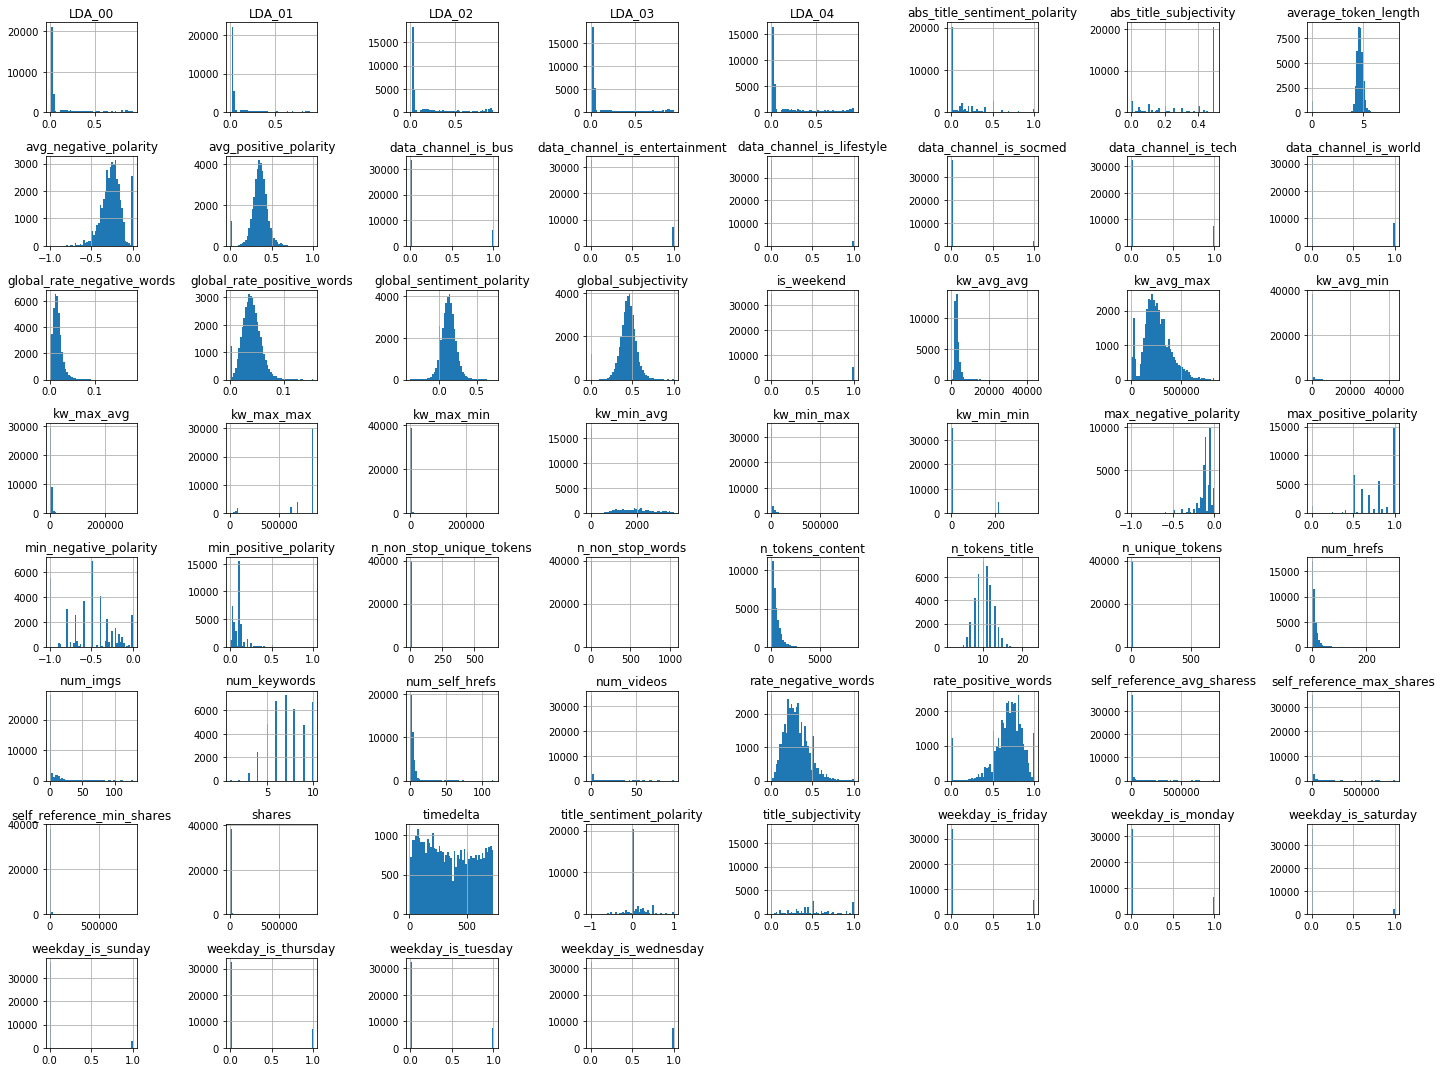

In [7]:
data.hist(bins=50,figsize=(20,15))
plt.tight_layout()
plt.show()


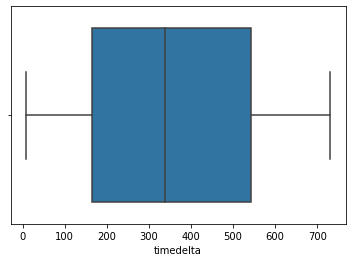

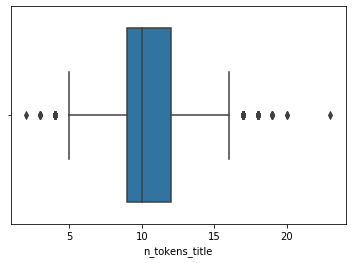

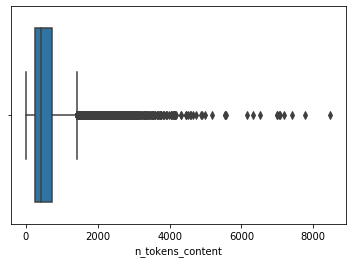

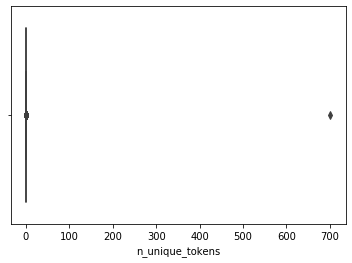

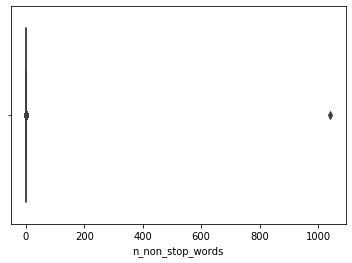

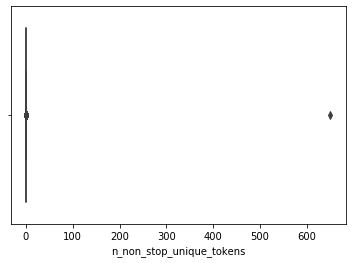

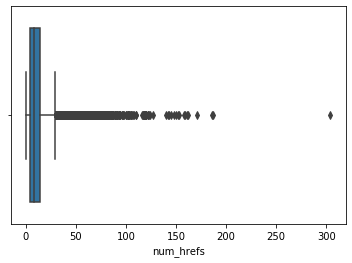

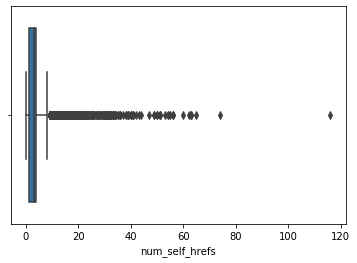

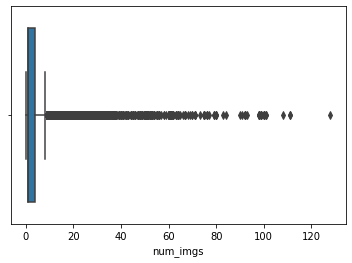

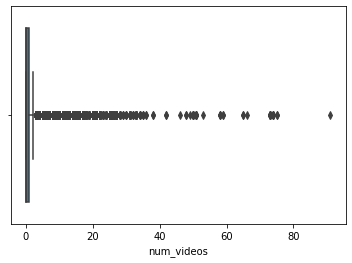

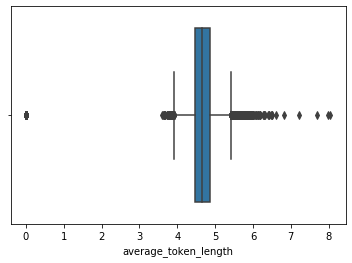

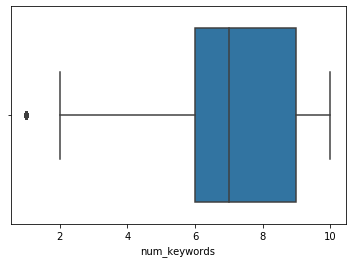

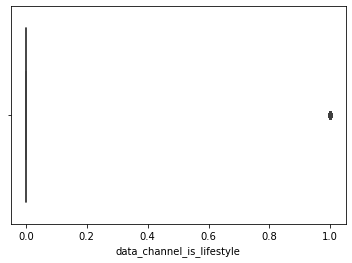

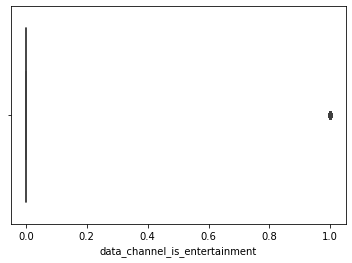

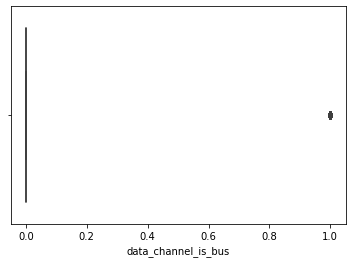

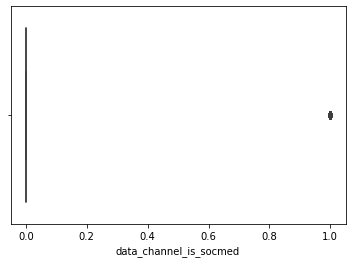

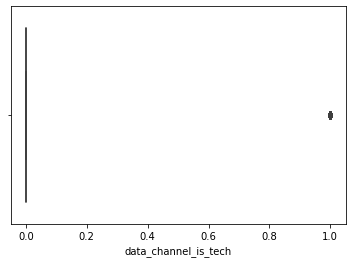

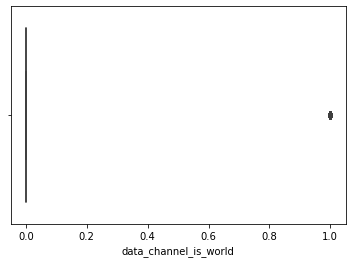

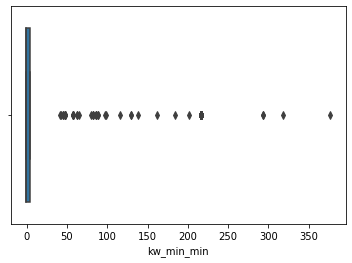

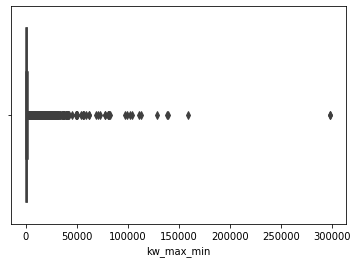

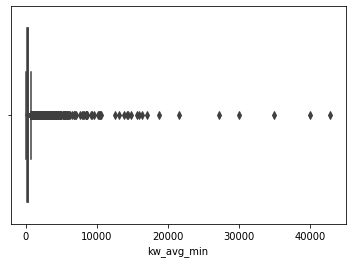

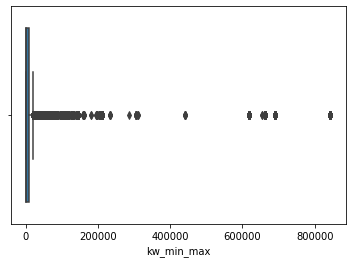

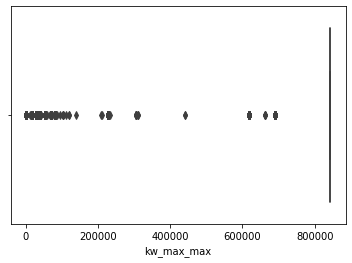

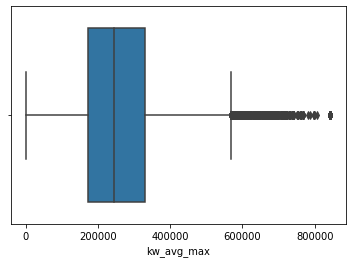

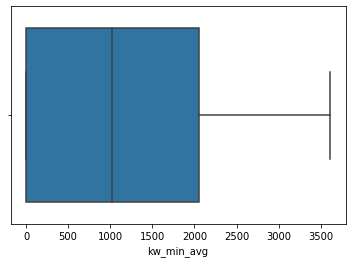

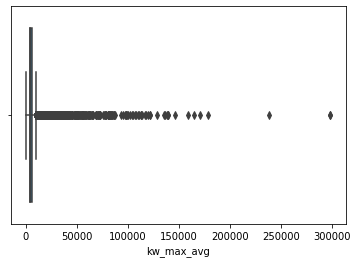

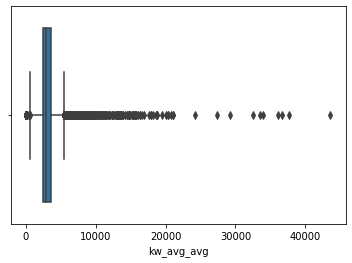

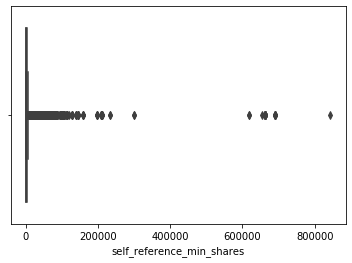

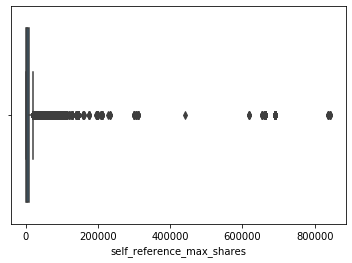

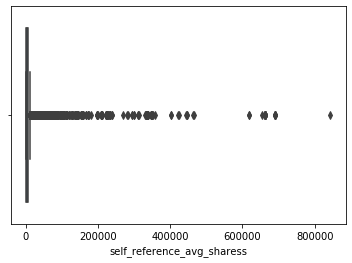

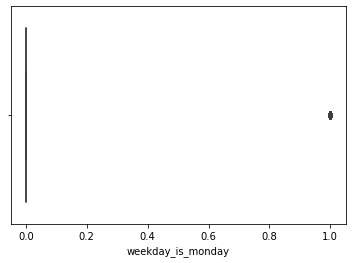

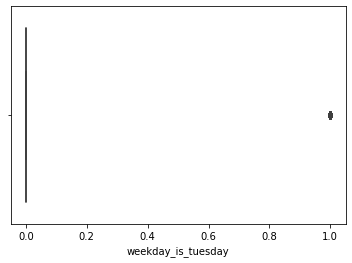

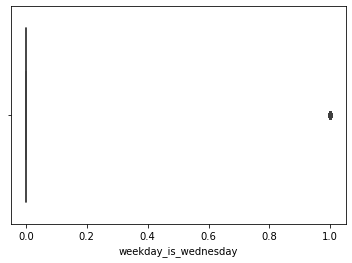

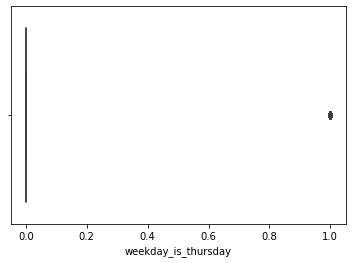

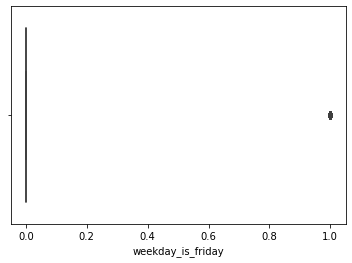

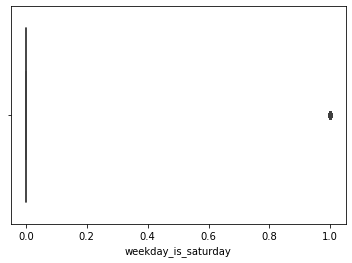

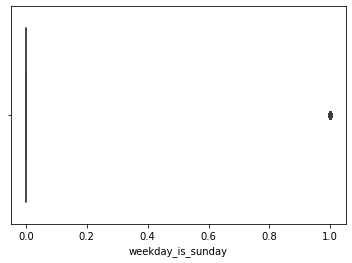

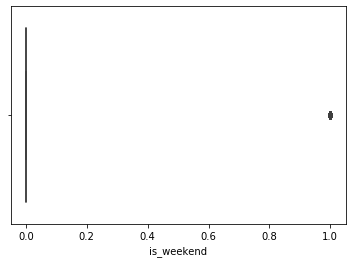

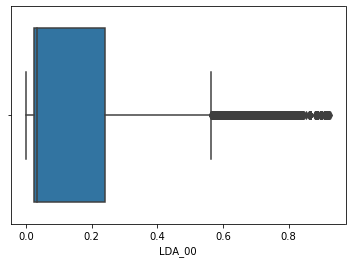

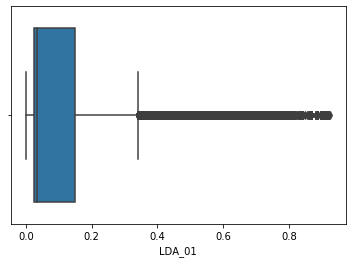

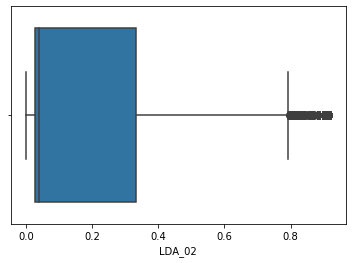

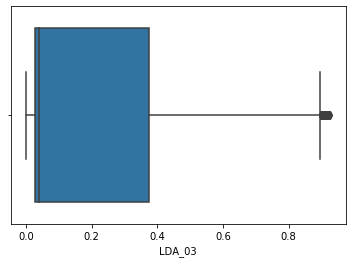

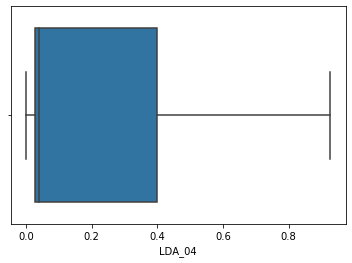

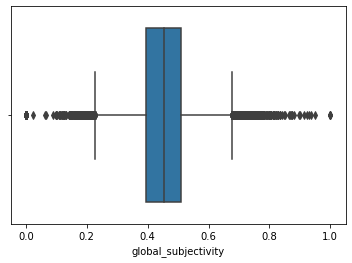

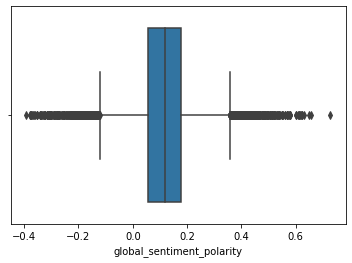

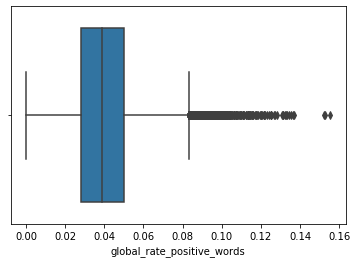

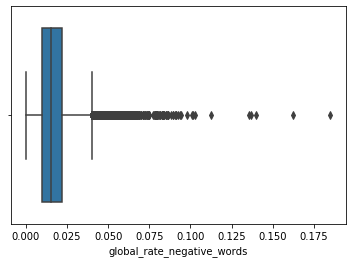

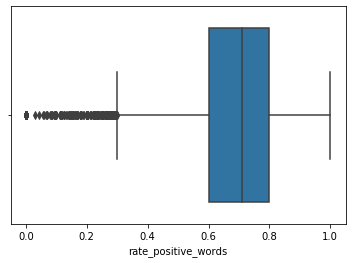

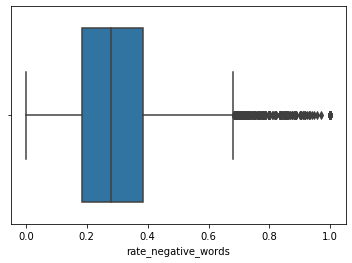

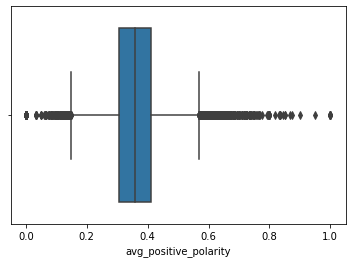

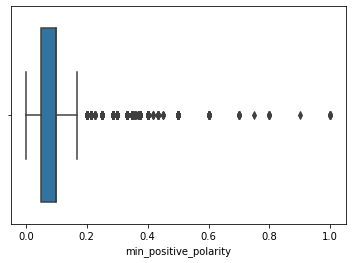

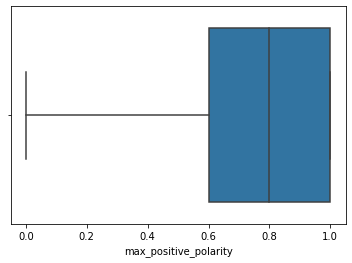

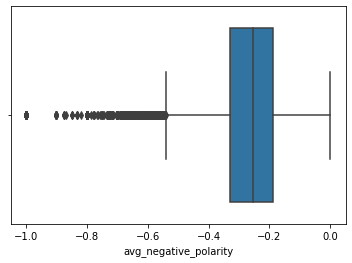

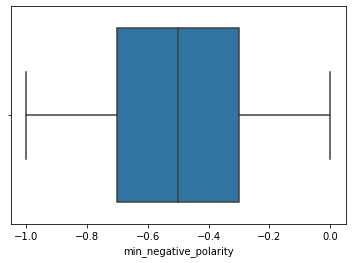

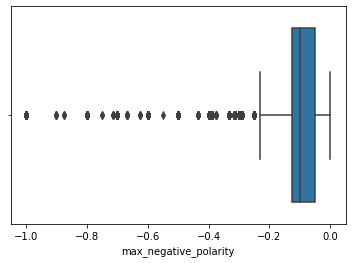

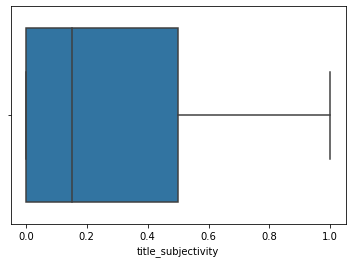

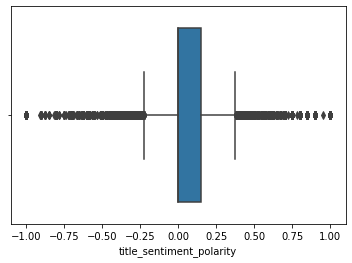

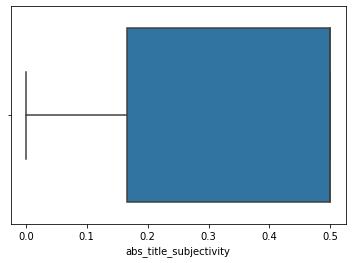

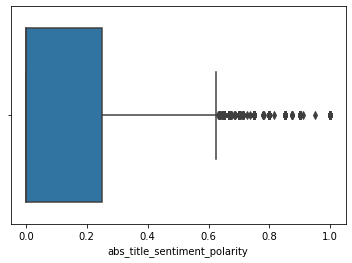

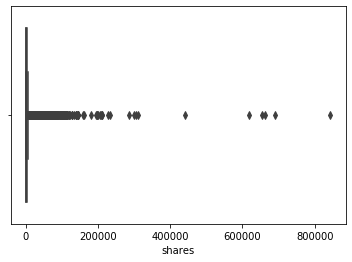

In [8]:
for i in data.columns:
    sns.boxplot(data[i])
    plt.show()

check Correlation

In [7]:
data.corr()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
timedelta,1.000000,-0.240320,-0.062867,0.002866,0.000089,0.003805,-0.000832,0.064530,-0.027636,0.000936,...,0.054772,0.098288,-0.000507,0.062175,-0.063239,-0.015919,0.038711,0.011551,-0.002745,0.008662
n_tokens_title,-0.240320,1.000000,0.018160,-0.005318,-0.004754,-0.005420,-0.053496,-0.014856,-0.008858,0.051460,...,-0.025069,-0.021662,-0.017096,-0.029146,0.011425,0.077245,0.000240,-0.146954,0.040550,0.008783
n_tokens_content,-0.062867,0.018160,1.000000,-0.004737,0.017512,0.000373,0.423065,0.304682,0.342600,0.103699,...,-0.261493,0.415706,-0.130375,-0.450603,0.225870,0.004484,0.023358,0.007136,0.013439,0.002459
n_unique_tokens,0.002866,-0.005318,-0.004737,1.000000,0.999572,0.999852,-0.004352,0.006620,0.018802,-0.000597,...,0.009193,-0.009054,0.001453,0.009902,-0.007315,-0.004678,-0.002333,-0.009242,-0.004217,0.000806
n_non_stop_words,0.000089,-0.004754,0.017512,0.999572,1.000000,0.999532,0.005521,0.013598,0.028486,-0.000899,...,0.000904,0.002062,-0.001372,-0.001214,-0.000761,-0.005389,-0.001650,-0.008511,-0.004391,0.000443
n_non_stop_unique_tokens,0.003805,-0.005420,0.000373,0.999852,0.999532,1.000000,-0.004983,0.007584,0.014230,-0.000963,...,0.008380,-0.002245,-0.001972,0.004318,-0.006708,-0.005860,-0.002910,-0.008572,-0.005342,0.000114
num_hrefs,-0.000832,-0.053496,0.423065,-0.004352,0.005521,-0.004983,1.000000,0.396452,0.342633,0.114518,...,-0.082168,0.286733,-0.152146,-0.263576,0.054948,0.043950,0.039041,0.009443,0.056525,0.045404
num_self_hrefs,0.064530,-0.014856,0.304682,0.006620,0.013598,0.007584,0.396452,1.000000,0.238586,0.077458,...,-0.072648,0.189922,-0.058222,-0.122071,0.039153,-0.011239,0.026224,0.008961,-0.006709,-0.001900
num_imgs,-0.027636,-0.008858,0.342600,0.018802,0.028486,0.014230,0.342633,0.238586,1.000000,-0.067336,...,-0.024683,0.155232,-0.072500,-0.136522,0.042644,0.056815,0.046310,-0.013759,0.063307,0.039388
num_videos,0.000936,0.051460,0.103699,-0.000597,-0.000899,-0.000963,0.114518,0.077458,-0.067336,1.000000,...,-0.010103,0.125659,-0.115976,-0.138190,0.027251,0.061028,0.021980,-0.021982,0.055231,0.023936


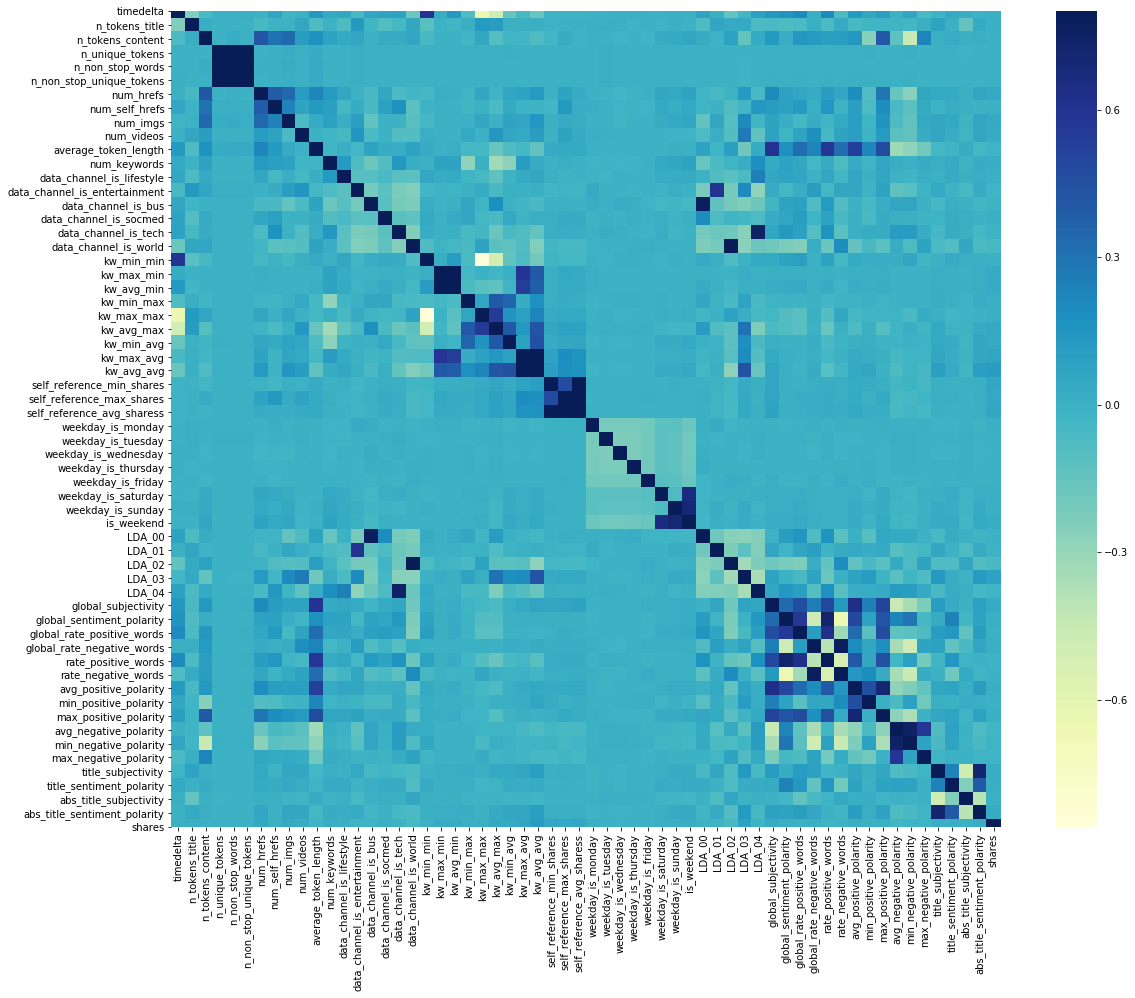

In [8]:
matrix = data.corr()
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(matrix, vmax=.8, square=True, cmap="YlGnBu");

Feature selection

In [9]:
data_new=data.copy()

In [10]:
A=data_new.iloc[:,0:59]
B=data_new.iloc[:,-1]

In [11]:
A

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,731,12,219,0.663594,1.0,0.815385,4,2,1,0,...,0.378636,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,731,9,255,0.604743,1.0,0.791946,3,1,1,0,...,0.286915,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,731,9,211,0.575130,1.0,0.663866,3,1,1,0,...,0.495833,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,731,9,531,0.503788,1.0,0.665635,9,0,1,0,...,0.385965,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,731,13,1072,0.415646,1.0,0.540890,19,19,20,0,...,0.411127,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,8,11,346,0.529052,1.0,0.684783,9,7,1,1,...,0.333791,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000
39640,8,12,328,0.696296,1.0,0.885057,9,7,3,48,...,0.374825,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000
39641,8,10,442,0.516355,1.0,0.644128,24,1,12,1,...,0.307273,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364
39642,8,6,682,0.539493,1.0,0.692661,10,1,1,0,...,0.236851,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000


In [12]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
bestfeature = SelectKBest(score_func=f_regression, k=10)
fit = bestfeature.fit(A,B)
dfscore= pd.DataFrame(fit.scores_)
dfcolumns= pd.DataFrame(A.columns)
featurescores = pd.concat([dfcolumns,dfscore],axis=1)
featurescores.columns =['features','score']
featurescores

,features,score
0,timedelta,2.974770
1,n_tokens_title,3.058346
2,n_tokens_content,0.239701
3,n_unique_tokens,0.025775
4,n_non_stop_words,0.007778
5,n_non_stop_unique_tokens,0.000517
6,num_hrefs,81.891755
7,num_self_hrefs,0.143169
8,num_imgs,61.595478
9,num_videos,22.725326


In [13]:
featurescores.nlargest(30,"score")

,features,score
26,kw_avg_avg,489.239956
41,LDA_03,280.160262
25,kw_max_avg,164.610050
40,LDA_02,139.243446
29,self_reference_avg_sharess,132.830299
27,self_reference_min_shares,124.518921
17,data_channel_is_world,97.360782
28,self_reference_max_shares,88.194845
6,num_hrefs,81.891755
23,kw_avg_max,79.316507


Make new data set 

In [14]:
df=data_new[["kw_avg_avg","LDA_03","kw_max_avg","LDA_02","self_reference_avg_sharess","self_reference_min_shares","data_channel_is_world",
      "self_reference_max_shares","num_hrefs","kw_avg_max","kw_min_avg","num_imgs","avg_negative_polarity","global_subjectivity",
        "kw_avg_min","kw_max_min","abs_title_sentiment_polarity","num_videos","average_token_length","title_subjectivity","num_keywords",
        "max_negative_polarity","min_negative_polarity","data_channel_is_entertainment","is_weekend","LDA_04","weekday_is_saturday",
        "data_channel_is_tech","rate_positive_words","title_sentiment_polarity","shares"]]
df

,kw_avg_avg,LDA_03,kw_max_avg,LDA_02,self_reference_avg_sharess,self_reference_min_shares,data_channel_is_world,self_reference_max_shares,num_hrefs,kw_avg_max,...,max_negative_polarity,min_negative_polarity,data_channel_is_entertainment,is_weekend,LDA_04,weekday_is_saturday,data_channel_is_tech,rate_positive_words,title_sentiment_polarity,shares
0,0.000000,0.041263,0.000000,0.040005,496.000000,496.0,0,496.0,4,0.0000,...,-0.200000,-0.600,1,0,0.040123,0,0,0.769231,-0.187500,593
1,0.000000,0.050101,0.000000,0.050096,0.000000,0.0,0,0.0,3,0.0000,...,-0.100000,-0.125,0,0,0.050001,0,0,0.733333,0.000000,711
2,0.000000,0.033334,0.000000,0.033351,918.000000,918.0,0,918.0,3,0.0000,...,-0.133333,-0.800,0,0,0.682188,0,0,0.857143,0.000000,1500
3,0.000000,0.028905,0.000000,0.494651,0.000000,0.0,0,0.0,9,0.0000,...,-0.166667,-0.600,1,0,0.028572,0,0,0.666667,0.000000,1200
4,0.000000,0.028572,0.000000,0.028575,3151.157895,545.0,0,16000.0,19,0.0000,...,-0.050000,-0.500,0,0,0.885427,0,1,0.860215,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,3031.115764,0.025000,4004.342857,0.151701,37033.333330,11400.0,0,48000.0,9,374962.5000,...,-0.125000,-0.500,0,0,0.773260,0,1,0.722222,0.000000,1800
39640,3411.660830,0.681635,5470.168651,0.231866,2100.000000,2100.0,0,2100.0,9,192985.7143,...,-0.100000,-0.400,0,0,0.028575,0,0,0.812500,1.000000,1900
39641,4206.439195,0.643794,6880.687034,0.025207,1400.000000,1400.0,0,1400.0,24,295850.0000,...,-0.166667,-0.800,0,0,0.146970,0,0,0.576923,0.136364,1900
39642,1777.895883,0.040002,3384.316871,0.839987,452.000000,452.0,1,452.0,10,254600.0000,...,-0.012500,-0.500,0,0,0.040004,0,0,0.466667,0.000000,1100


check Correlation

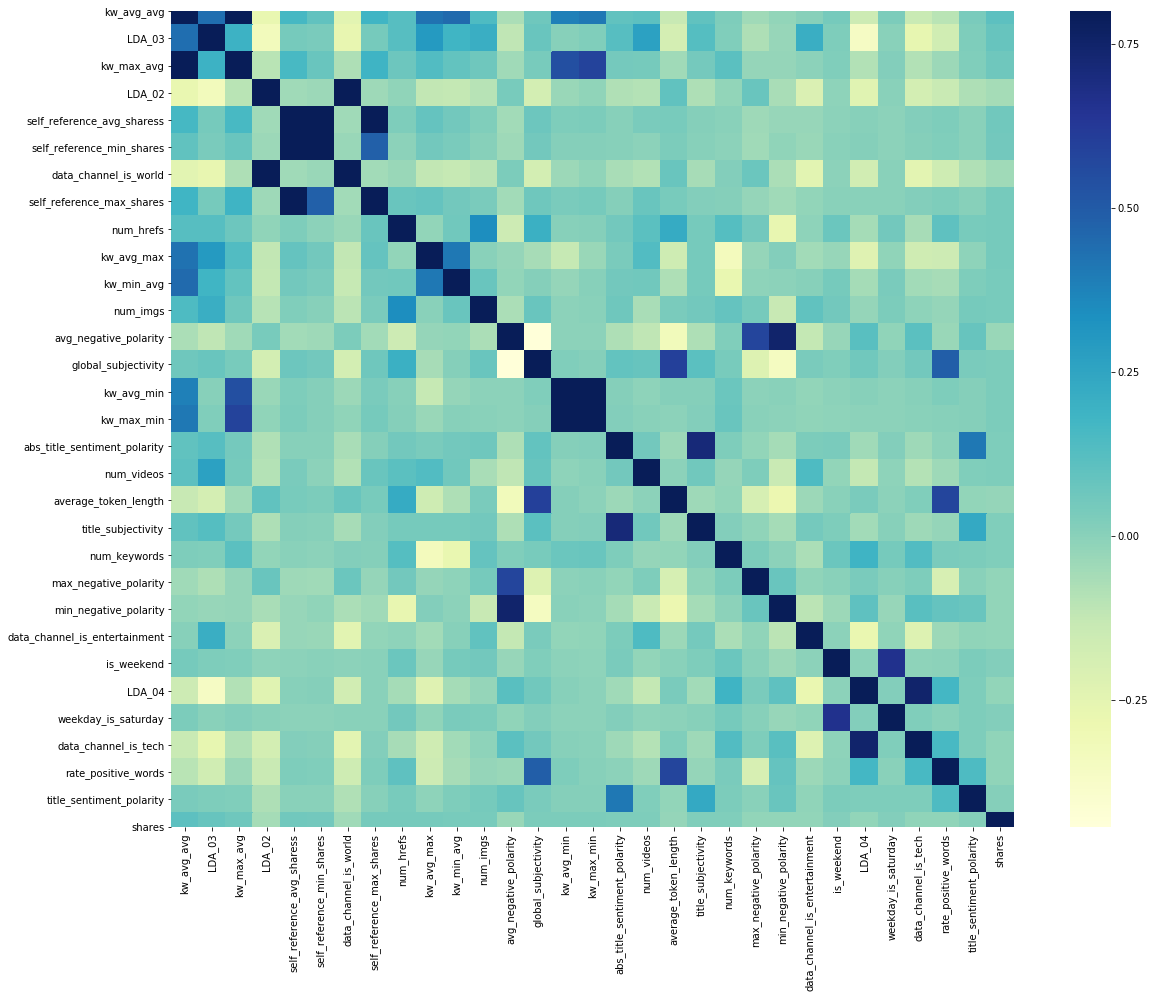

In [15]:
matrix = df.corr()
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(matrix, vmax=.8, square=True, cmap="YlGnBu");

multicollinearity not checked in modern statistics/machine learning.

Test_train_split

In [16]:
Y=df['shares']
Y

0         593
1         711
2        1500
3        1200
4         505
         ... 
39639    1800
39640    1900
39641    1900
39642    1100
39643    1300
Name: shares, Length: 39644, dtype: int64

In [17]:
X=df.drop("shares",axis=1)
X

,kw_avg_avg,LDA_03,kw_max_avg,LDA_02,self_reference_avg_sharess,self_reference_min_shares,data_channel_is_world,self_reference_max_shares,num_hrefs,kw_avg_max,...,num_keywords,max_negative_polarity,min_negative_polarity,data_channel_is_entertainment,is_weekend,LDA_04,weekday_is_saturday,data_channel_is_tech,rate_positive_words,title_sentiment_polarity
0,0.000000,0.041263,0.000000,0.040005,496.000000,496.0,0,496.0,4,0.0000,...,5,-0.200000,-0.600,1,0,0.040123,0,0,0.769231,-0.187500
1,0.000000,0.050101,0.000000,0.050096,0.000000,0.0,0,0.0,3,0.0000,...,4,-0.100000,-0.125,0,0,0.050001,0,0,0.733333,0.000000
2,0.000000,0.033334,0.000000,0.033351,918.000000,918.0,0,918.0,3,0.0000,...,6,-0.133333,-0.800,0,0,0.682188,0,0,0.857143,0.000000
3,0.000000,0.028905,0.000000,0.494651,0.000000,0.0,0,0.0,9,0.0000,...,7,-0.166667,-0.600,1,0,0.028572,0,0,0.666667,0.000000
4,0.000000,0.028572,0.000000,0.028575,3151.157895,545.0,0,16000.0,19,0.0000,...,7,-0.050000,-0.500,0,0,0.885427,0,1,0.860215,0.136364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,3031.115764,0.025000,4004.342857,0.151701,37033.333330,11400.0,0,48000.0,9,374962.5000,...,8,-0.125000,-0.500,0,0,0.773260,0,1,0.722222,0.000000
39640,3411.660830,0.681635,5470.168651,0.231866,2100.000000,2100.0,0,2100.0,9,192985.7143,...,7,-0.100000,-0.400,0,0,0.028575,0,0,0.812500,1.000000
39641,4206.439195,0.643794,6880.687034,0.025207,1400.000000,1400.0,0,1400.0,24,295850.0000,...,8,-0.166667,-0.800,0,0,0.146970,0,0,0.576923,0.136364
39642,1777.895883,0.040002,3384.316871,0.839987,452.000000,452.0,1,452.0,10,254600.0000,...,5,-0.012500,-0.500,0,0,0.040004,0,0,0.466667,0.000000


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=42)

shorlist Models

Mean Square error

Root mean square error

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

models=[]
models.append(("LR",LinearRegression()))
models.append(("DTR",DecisionTreeRegressor()))
models.append(("SVM",SVR()))
models.append(("KNN",KNeighborsRegressor()))

for name, model in models:
    model.fit(X_train,Y_train)
    housing=model.predict(X_train)
    lin_mse=mean_squared_error(Y_train,housing)
    ab=np.sqrt(lin_mse)
    print(name,ab)

LR 11664.65705861225
DTR 0.0
SVM 11951.992624001823
KNN 10397.385145510541


using K-fold cross_validation

Root mean Square error

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

models1=[]
models1.append(("LR",LinearRegression()))
models1.append(("DTR",DecisionTreeRegressor()))
models1.append(("SVM",SVR()))
models1.append(("KNN",KNeighborsRegressor()))
results = []
names = []
for name, model in models1:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring="neg_mean_squared_error")
    score=np.sqrt(-cv_results)
    results.append(score)
    names.append(name)
    msg = "%s: %f (%f)" % (name, score.mean(), score.std())
    print(msg)

LR: 10824.586082 (4393.181728)
DTR: 16876.115053 (4142.262345)
SVM: 11140.301232 (4329.736609)
KNN: 11966.768985 (4060.498118)


Feature Scaling with K-fold cross-validation<br>**Standardization**

Root Mean Square error

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
 LinearRegression())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
 KNeighborsRegressor())])))
pipelines.append(('ScaledDTR', Pipeline([('Scaler', StandardScaler()),('DTR',
 DecisionTreeRegressor())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVR())])))
pipelines.append(("ScaledRFR", Pipeline([('Scaler', StandardScaler()),('RF',RandomForestRegressor())])))
results = []
names = []
for name, model in pipelines:
    
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring="neg_mean_squared_error")
    score=np.sqrt(-cv_results)
    results.append(score)
    names.append(name)
    msg = "%s: %f (%f)" % (name, score.mean(), score.std())
    print(msg)

ScaledLR: 10824.586082 (4393.181728)
ScaledKNN: 11835.027686 (3942.909692)
ScaledDTR: 19806.603817 (4356.405976)
ScaledSVM: 11111.184310 (4336.147655)
ScaledRFR: 12018.892564 (3931.161071)


Linear regression is the best algo.We see but we check all algorithm.